# 📊 Stock & Revenue Analysis: Tesla and GameStop
*A project from the RFix Finance & Data Science Collection*

---

### 🔎 Overview
This notebook explores and visualizes the **stock price trends** and **revenue data** of two iconic companies:  
- **Tesla (TSLA)**, a leader in electric vehicles.  
- **GameStop (GME)**, known for its retail business and famous short squeeze episode.  

The analysis includes:  
- Extracting stock data using `yfinance`  
- Scraping revenue data from online sources  
- Building simple dashboards to compare stock prices and revenues  

This project was originally a lab assignment of *Python Project for Data Science* but has been extended and polished as part of the **RFix repository**, showcasing practical applications of **Python in finance**.  

---

📅 *Date:* October 2025  
👩‍💻 *Author:* Pansuriya Foram Rasikbhai  
📂 *Repository:* [RFix](https://github.com/pansuriyaForam/RFiX)

## 🎯 Project Objectives

This project focuses on combining **financial data extraction**, **web scraping**, and **data visualization** to gain insights into company performance.  

Specifically, the objectives are:  

1. **Collect Historical Stock Data**  
   - Retrieve long-term stock price data for Tesla (TSLA) and GameStop (GME) using `yfinance`.  

2. **Collect Revenue Data**  
   - Extract and clean quarterly revenue data for both companies using web scraping.  

3. **Explore Data Trends**  
   - Perform initial exploration of stock and revenue datasets.  
   - Identify growth patterns and anomalies.  

4. **Build Dashboards**  
   - Create interactive visualizations combining stock price and revenue.  
   - Compare Tesla and GameStop performance side by side.  

5. **Generate Insights**  
   - Highlight key findings (e.g., growth trajectories, volatility).  
   - Relate stock movements to revenue trends.  

6. **Provide Reusable Framework**  
   - Document the workflow clearly so the same approach can be applied to other companies in future RFix projects.  


## ⚙️ Setup & Dependencies

This project is implemented in **Python** and requires the following libraries:

- **yfinance** → Fetch historical stock price data.  
- **pandas** → Data handling and manipulation.  
- **matplotlib** → Visualization of stock prices and revenues.  
- **BeautifulSoup4** → Web scraping for revenue data.  
- **lxml** → Parsing HTML for structured data extraction.  
- **requests** → Handling HTTP requests for scraping.  

Before running the notebook, ensure the libraries are installed:


In [2]:
!pip install yfinance beautifulsoup4 pandas matplotlib lxml

import yfinance as yf
import pandas as pd
import warnings
from bs4 import BeautifulSoup, XMLParsedAsHTMLWarning
import requests
import matplotlib.pyplot as plt
import re


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Foram\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 📈 Tesla Stock Data

We begin by extracting Tesla’s historical stock data using `yfinance`.  
The dataset provides daily prices, trading volume, and other metrics.  

Steps:  
- Fetch data using `yf.Ticker("TSLA")`  
- Retrieve the full trading history with `.history(period="max")`  
- Preview the dataset (head, tail, shape)  

In [3]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## 💰 Tesla Revenue Data

Quarterly revenue data is collected by web scraping from publicly available financial reports.  
After extraction, the dataset is cleaned to ensure consistent formatting for analysis.  


In [4]:
import warnings
from bs4 import BeautifulSoup, XMLParsedAsHTMLWarning
import requests
import pandas as pd

warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

respond = requests.get(url)
respond.raise_for_status()   # will raise if URL still wrong
html = respond.text
soup = BeautifulSoup(html, "html.parser")

# 1) pandas' HTML table parser (quick)
try:
    candidate_tables = pd.read_html(html)
except Exception:
    candidate_tables = []

tesla_revenue = None

# 2) Search candidate tables for a Revenue-like column
for df in candidate_tables:
    cols = [str(c).lower() for c in df.columns]
    if any("revenue" in c for c in cols) or any("tesla" in str(v).lower() for v in df.values.flatten() if isinstance(v, str)):
        tesla_revenue = df.copy()
        break

# 3) FALLBACK: parse plain text block "Tesla Quarterly Revenue"
if tesla_revenue is None:
    text = soup.get_text(separator="\n")
    start_idx = text.find("Tesla Quarterly Revenue")
    if start_idx != -1:
        # take a chunk after that header (adjust length if necessary)
        block = text[start_idx:start_idx + 8000]
        # matches lines like: 2022-09-30 $21,454  OR 2022-09-30 21,454
        matches = re.findall(r"(\d{4}-\d{2}-\d{2})\s+\$?([\d,]+)", block)
        if matches:
            tesla_revenue = pd.DataFrame(matches, columns=["Date", "Revenue"])
            tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").astype(int)
            # optional: convert Date to datetime
            tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

if tesla_revenue is not None:
    print("✅ Found Tesla revenue (preview):")
    print(tesla_revenue.tail())
else:
    print("❌ Tesla Revenue DataFrame not found. (Checked pd.read_html and text fallback)")

✅ Found Tesla revenue (preview):
    Tesla Annual Revenue (Millions of US $)  \
8                                      2013   
9                                      2012   
10                                     2011   
11                                     2010   
12                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
8                                     $2,013  
9                                       $413  
10                                      $204  
11                                      $117  
12                                      $112  


C:\Users\Foram\AppData\Local\Temp\ipykernel_28952\132592952.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  candidate_tables = pd.read_html(html)


## 📈 GameStop Stock Data

Next, we collect historical stock price data for GameStop (GME) using the same approach as Tesla.  
This ensures comparability between the two companies.  

In [5]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## 💰 GameStop Revenue Data

Quarterly revenue data for GameStop is extracted and cleaned using web scraping.  
Together with stock data, this will allow us to build combined dashboards for insights.  


In [6]:
warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

# Try to find the GME revenue table using pandas
try:
    candidate_tables = pd.read_html(html_data)
except Exception:
    candidate_tables = []

gme_revenue = None

# Search candidate tables for a Revenue-like column or GameStop/GME in values
for df in candidate_tables:
    cols = [str(c).lower() for c in df.columns]
    # Flexible matching for 'revenue' in columns or 'gme'/'gamestop' in values
    if any("revenue" in c for c in cols) or \
       any("gme" in str(v).lower() or "gamestop" in str(v).lower() for v in df.values.flatten() if isinstance(v, str)):
        gme_revenue = df.copy()
        break

# Fallback: Try to extract from plain text if not found
if gme_revenue is None:
    text = soup.get_text(separator="\n")
    start_idx = text.find("GameStop Quarterly Revenue")
    if start_idx != -1:
        block = text[start_idx:start_idx + 8000]
        matches = re.findall(r"(\d{4}-\d{2}-\d{2})\s+\$?([\d,]+)", block)
        if matches:
            gme_revenue = pd.DataFrame(matches, columns=["Date", "Revenue"])
            gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").astype(int)
            gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

if gme_revenue is not None:
    print("✅ Found GME revenue (preview):")
    print(gme_revenue.tail())
else:
    print("❌ GME Revenue DataFrame not found. (Checked pd.read_html and text fallback)")

✅ Found GME revenue (preview):
    Tesla Annual Revenue (Millions of US $)  \
8                                      2013   
9                                      2012   
10                                     2011   
11                                     2010   
12                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
8                                     $2,013  
9                                       $413  
10                                      $204  
11                                      $117  
12                                      $112  


C:\Users\Foram\AppData\Local\Temp\ipykernel_28952\2974379998.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  candidate_tables = pd.read_html(html_data)


## 📊 Tesla Stock & Revenue Dashboard

This section visualizes Tesla’s stock prices alongside its revenue data.  
Stock trends and revenue figures are displayed together to provide a combined view of company performance.


In [7]:
# function to plot stock data
def make_graph(data, title):
    plt.figure(figsize=(12,6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.show()

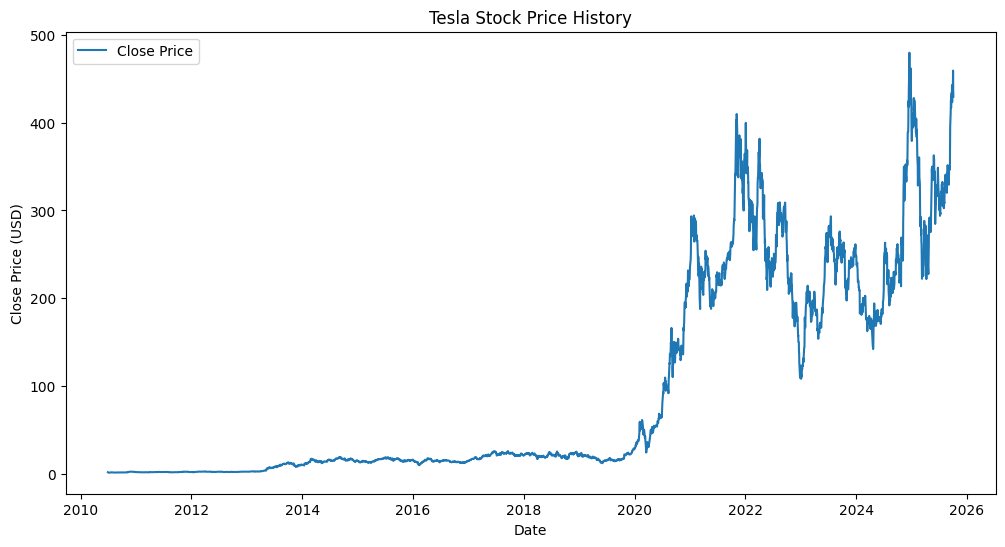

In [8]:
make_graph(tesla_data, 'Tesla Stock Price History')

## 📊 GameStop Stock & Revenue Dashboard

This section presents visualizations that combine GameStop’s historical stock prices and revenue data.  
The goal is to show both metrics in a single view for easier comparison.


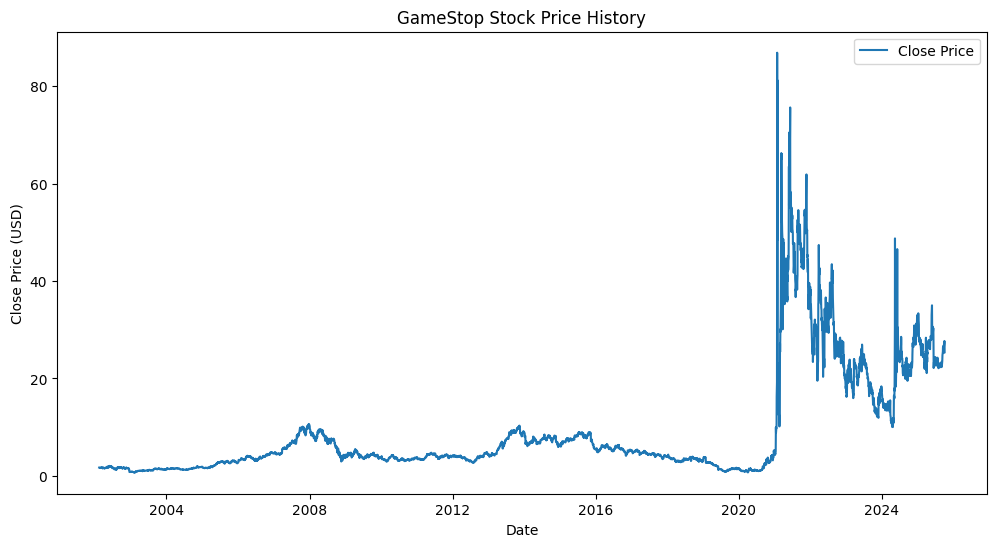

In [9]:
make_graph(gme_data, 'GameStop Stock Price History')

## 🧾 Summary & Conclusion

This project demonstrated the process of gathering, cleaning, and visualizing stock and revenue data for two distinct companies — **Tesla (TSLA)** and **GameStop (GME)**.  

By combining financial data from APIs (`yfinance`) and publicly available web sources, we built a unified view of both companies’ performance trends over time.

Key takeaways:
- Historical stock prices were successfully extracted and visualized, showing clear differences in market behavior.  
- Revenue data was obtained and structured for comparison alongside stock data.  
- The dashboards offer a compact visual summary of each company’s trajectory.  

This notebook serves as a **reusable framework** for financial analytics within the **RFix repository**, showcasing how Python can be used to integrate market data and business fundamentals into clear, data-driven insights.  